# Loading the required libraries


In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Sequential

Using TensorFlow backend.


# Training and Test Directories 

In [2]:
train_dir = 'D:\College\Semester 7\Capstone\Dataset\Train'
test_dir = 'D:\College\Semester 7\Capstone\Dataset\Test'

# Batch Size and Image Generators

In [3]:
batch_size = 32
target_size = 320,320
# Create ImageDataGenerators for training and testing
train_datagen = ImageDataGenerator(rescale=1./255,
                                    validation_split=0.2)
# #                                    rotation_range = 40,
# #                                    width_shift_range = 0.2,
# #                                    height_shift_range = 0.2,
# #                                    zoom_range = 0.3,
# #                                    fill_mode = 'nearest',
#                                     )
test_datagen = ImageDataGenerator(rescale=1./255)

# Create data generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=target_size,  # Allow variable input sizes
    batch_size=batch_size,
    class_mode='categorical',  
    color_mode='rgb',
    subset='training'     
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical',
    color_mode='rgb',
    shuffle=False
)

validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical',
    color_mode='rgb',
    subset='validation'
)

Found 17379 images belonging to 10 classes.
Found 5434 images belonging to 10 classes.
Found 4340 images belonging to 10 classes.


# Defining the model

5 max pooling layers


In [11]:
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(None, None, 3), padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(48, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(96, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(192, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    layers.GlobalAveragePooling2D(),
    layers.Dropout(0.2),
    layers.Dense(128, activation='relu'),
    layers.Dense(train_generator.num_classes, activation='softmax')  # Adjust to the number of classes
])


# Compile the model 

In [12]:
model.compile(optimizer='adam', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, None, None, 32)    896       
_________________________________________________________________
batch_normalization_6 (Batch (None, None, None, 32)    128       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, None, None, 32)    0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, None, None, 48)    13872     
_________________________________________________________________
batch_normalization_7 (Batch (None, None, None, 48)    192       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, None, None, 48)    0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, None, None, 64)   

LR Scheduler


In [5]:
# Define the learning rate scheduler
def scheduler(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return lr * tf.math.exp(-0.1)

lr_scheduler = keras.callbacks.LearningRateScheduler(scheduler, verbose=0)

# Training the model

In [7]:
# Train the model
history = model.fit(
    train_generator, 
    epochs=20, 
    validation_data=validation_generator,
    callbacks=[lr_scheduler])


# Save the trained model
model.save('Model1.2.h5')

Epoch 1/20
544/544 [==============================] - 2208s 4s/step - loss: 1.3347 - accuracy: 0.5047 - val_loss: 3.4208 - val_accuracy: 0.2028
Epoch 2/20
544/544 [==============================] - 2140s 4s/step - loss: 1.0894 - accuracy: 0.5835 - val_loss: 2.0236 - val_accuracy: 0.3823
Epoch 3/20
544/544 [==============================] - 2165s 4s/step - loss: 1.0041 - accuracy: 0.6083 - val_loss: 4.1151 - val_accuracy: 0.1212
Epoch 4/20
544/544 [==============================] - 2143s 4s/step - loss: 0.9374 - accuracy: 0.6303 - val_loss: 2.0951 - val_accuracy: 0.4041
Epoch 5/20
544/544 [==============================] - 2156s 4s/step - loss: 0.8804 - accuracy: 0.6558 - val_loss: 3.6151 - val_accuracy: 0.1917
Epoch 6/20
544/544 [==============================] - 2155s 4s/step - loss: 0.8434 - accuracy: 0.6701 - val_loss: 2.0509 - val_accuracy: 0.3565
Epoch 7/20
544/544 [==============================] - 2130s 4s/step - loss: 0.7975 - accuracy: 0.6847 - val_loss: 5.0733 - val_accuracy:

# Training vs Validation

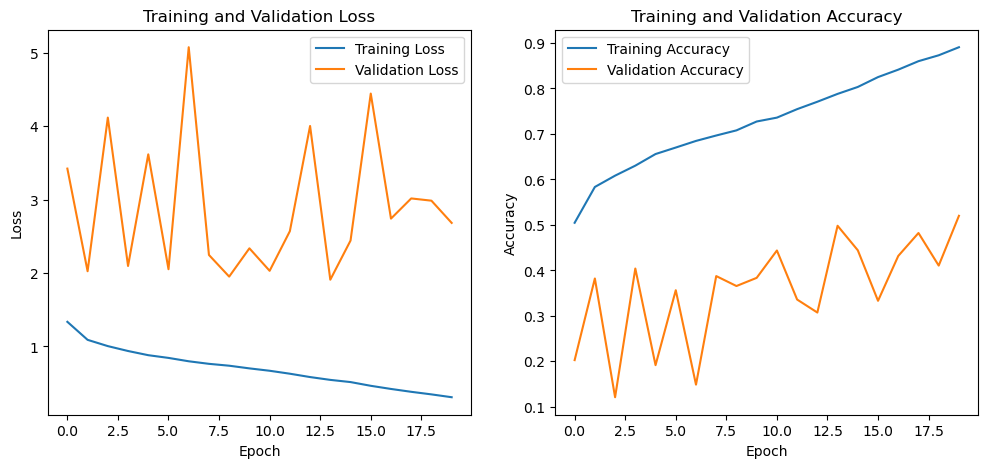

In [8]:
# Plot training history
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# Model Metrics

In [9]:
# Load test data into memory
X_test, y_test = [], []
for i in range(len(test_generator)):
    batch_X, batch_y = test_generator[i]
    X_test.append(batch_X)
    y_test.append(batch_y)
X_test = np.concatenate(X_test)
y_test = np.concatenate(y_test)

# Make predictions on test data
y_pred = model.predict(X_test)

# Convert one-hot encoded predictions to class labels
y_pred_classes = np.argmax(y_pred, axis=1)

# Convert true labels from one-hot encoding to class labels
y_true_classes = np.argmax(y_test, axis=1)

# Generate classification report
report = classification_report(y_true_classes, y_pred_classes)
print("\nClassification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.54      0.56       336
           1       0.48      0.61      0.54       421
           2       0.88      0.93      0.90       628
           3       0.43      0.54      0.48       252
           4       0.85      0.81      0.83       665
           5       0.88      0.92      0.90      1594
           6       0.70      0.57      0.63       416
           7       0.51      0.45      0.48       411
           8       0.69      0.53      0.60       370
           9       0.51      0.48      0.49       341

    accuracy                           0.73      5434
   macro avg       0.65      0.64      0.64      5434
weighted avg       0.73      0.73      0.72      5434



# Confusion Matrix

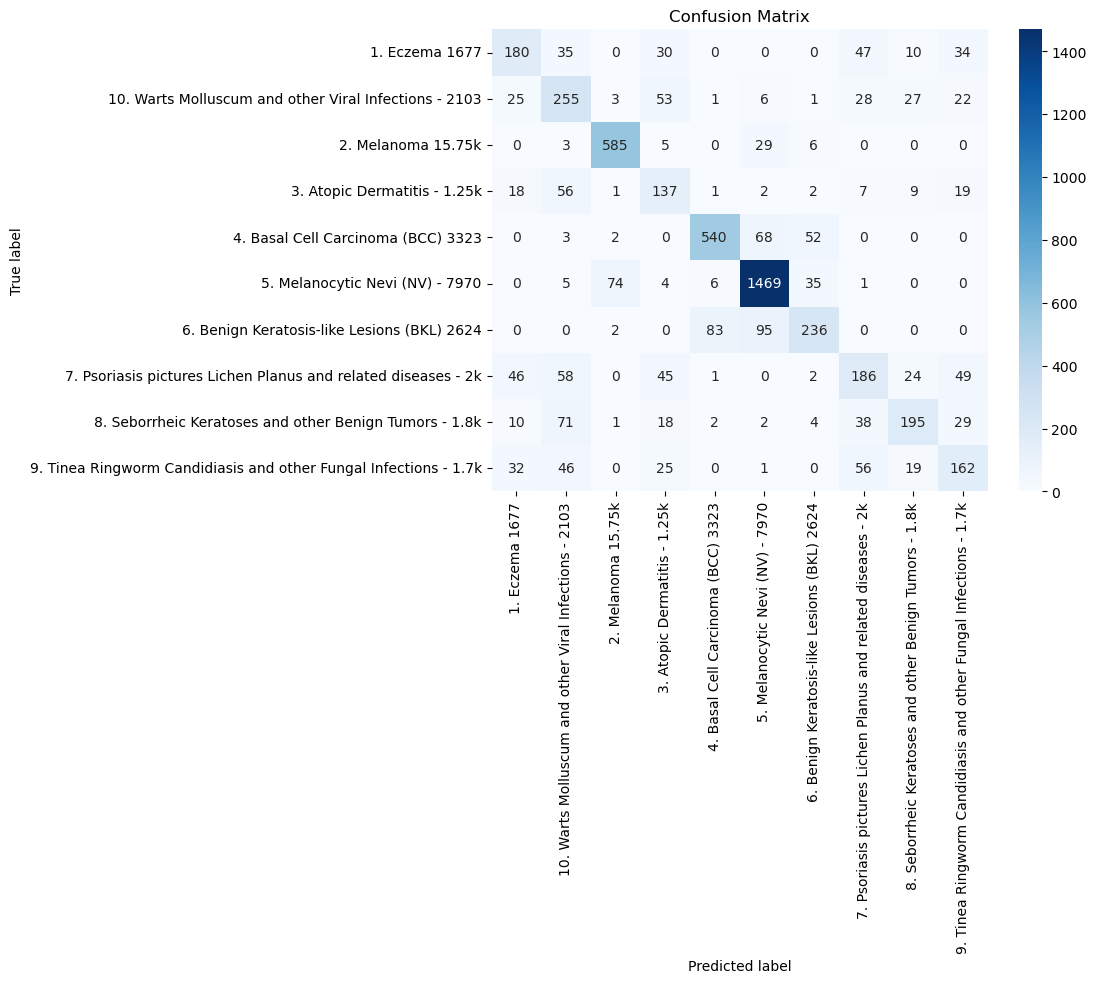

In [10]:
# Generate and plot confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

## Training the model for a few more epochs


In [6]:
model = load_model('Model1.2.h5')
path = 'Model1.2.h5'
# path = input("Save file, with h5: ")
# Define the ModelCheckpoint callback
checkpoint = ModelCheckpoint(
    filepath=path,  # Filepath to save the best model
    monitor='val_accuracy',    # Metric to monitor
    mode='max',                # Save the model with the maximum validation accuracy
    save_best_only=True,       # Save only when the monitored metric improves
    verbose=1                  # Verbose output for clarity
)

# Train the model
history = model.fit(
    train_generator, 
    epochs=10, 
    validation_data=validation_generator,
    callbacks=[lr_scheduler,checkpoint])



Epoch 1/10
544/544 [==============================] - ETA: 0s - loss: 0.2782 - accuracy: 0.9005
Epoch 00001: val_accuracy improved from -inf to 0.48571, saving model to Model1.2.h5
544/544 [==============================] - 2242s 4s/step - loss: 0.2782 - accuracy: 0.9005 - val_loss: 2.4935 - val_accuracy: 0.4857
Epoch 2/10
544/544 [==============================] - ETA: 0s - loss: 0.2576 - accuracy: 0.9073
Epoch 00002: val_accuracy improved from 0.48571 to 0.54171, saving model to Model1.2.h5
544/544 [==============================] - 2120s 4s/step - loss: 0.2576 - accuracy: 0.9073 - val_loss: 2.6727 - val_accuracy: 0.5417
Epoch 3/10
544/544 [==============================] - ETA: 0s - loss: 0.2268 - accuracy: 0.9218
Epoch 00003: val_accuracy did not improve from 0.54171
544/544 [==============================] - 2112s 4s/step - loss: 0.2268 - accuracy: 0.9218 - val_loss: 3.1792 - val_accuracy: 0.4214
Epoch 4/10
544/544 [==============================] - ETA: 0s - loss: 0.2056 - accura

KeyboardInterrupt: 

## Classification Report

In [8]:
# Load test data into memory
X_test, y_test = [], []
for i in range(len(test_generator)):
    batch_X, batch_y = test_generator[i]
    X_test.append(batch_X)
    y_test.append(batch_y)
X_test = np.concatenate(X_test)
y_test = np.concatenate(y_test)

model = load_model('Model1.2.h5')
# Make predictions on test data
y_pred = model.predict(X_test)

# Convert one-hot encoded predictions to class labels
y_pred_classes = np.argmax(y_pred, axis=1)

# Convert true labels from one-hot encoding to class labels
y_true_classes = np.argmax(y_test, axis=1)

# Generate classification report
report = classification_report(y_true_classes, y_pred_classes)
print("\nClassification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.46      0.52       336
           1       0.54      0.55      0.55       421
           2       0.90      0.92      0.91       628
           3       0.41      0.60      0.49       252
           4       0.83      0.82      0.82       665
           5       0.88      0.92      0.90      1594
           6       0.68      0.61      0.64       416
           7       0.46      0.46      0.46       411
           8       0.66      0.55      0.60       370
           9       0.55      0.51      0.53       341

    accuracy                           0.73      5434
   macro avg       0.65      0.64      0.64      5434
weighted avg       0.73      0.73      0.72      5434



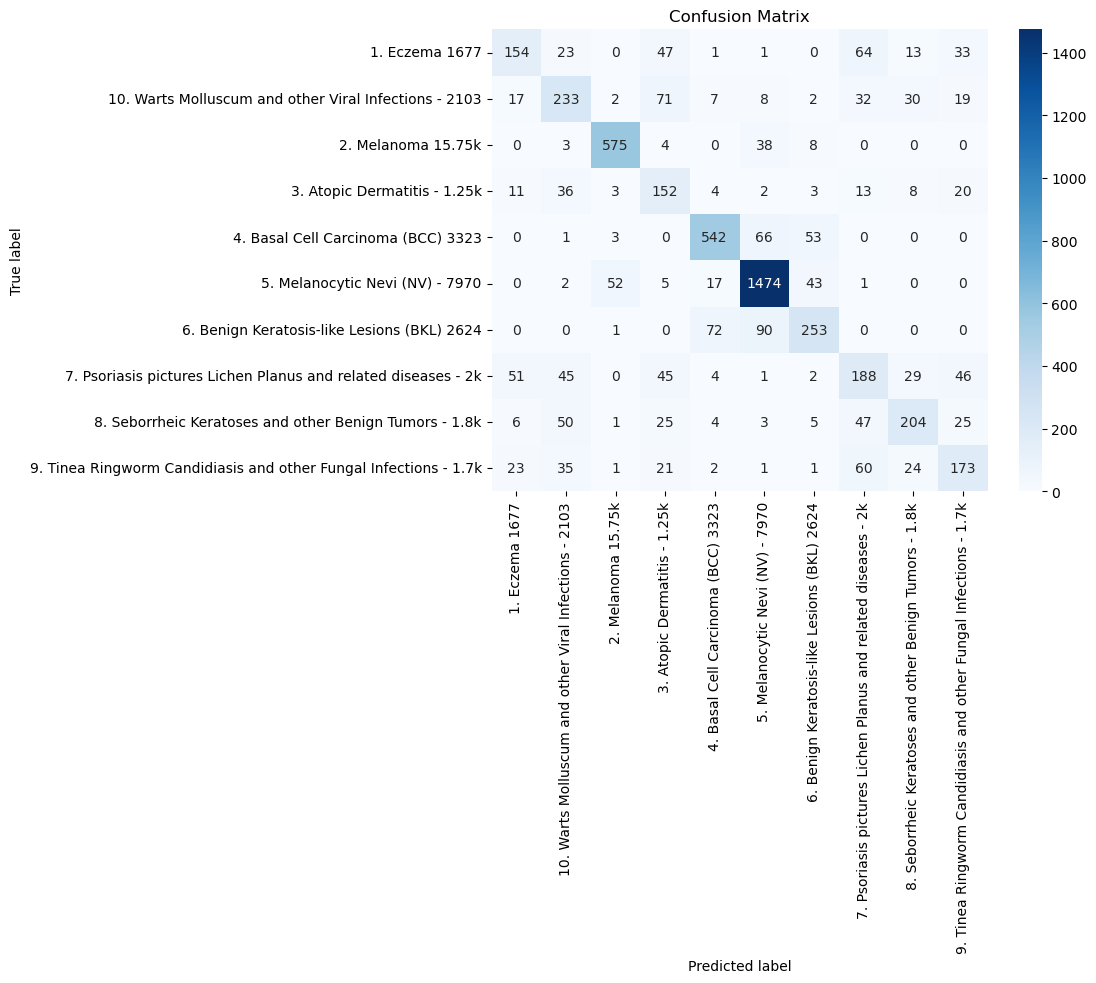

In [9]:
# Generate and plot confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()